<a href="https://colab.research.google.com/github/anshumbanga/Jason-Motor-Group/blob/main/Jason%20Motor%20Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing major libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
from plotly.offline import init_notebook_mode,download_plotlyjs
cf.go_offline(connected=True)

# importing additional libraries
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('JMG_data.csv',nrows=None)

# about the dataset
This dataset contains records of vehicle listings from Craigslist contains most all relevant information that Craigslist provides on car sales such as price, condition, manufacturer, and other attributes.

In [16]:
df.columns

Index(['CarID', 'Listed_Price', 'Listed_Date', 'Make', 'Model', 'Year',
       'Vehicle_Type', 'Size', 'Color', 'Transmission', 'Fuel_Type', 'Drive',
       'Cylinders', 'Odometer', 'Condition', 'Title_Status', 'State',
       'Region'],
      dtype='object')

### Column Descriptions

- **Car ID**: An automatically generated index column.  
- **Listed_Price**: The listed price of the vehicle in USD.  
- **Listed_Date**: The date when the vehicle listing was posted.  
- **Make**: The name of the vehicle’s manufacturer.  
- **Model**: The specific model name of the vehicle.  
- **Year**: The build year of the vehicle.  
- **Vehicle_Type**: The classification of the vehicle.  
- **Size**: The size category of the vehicle.  
- **Color**: The exterior colour of the vehicle.  
- **Transmission**: The type of transmission (e.g., automatic, manual).  
- **Fuel_Type**: The type of energy the vehicle uses (e.g., gas, diesel, hybrid, electric).  
- **Drive**: The drivetrain configuration (e.g., FWD, RWD, AWD).  
- **Cylinders**: The number of engine cylinders.  
- **Odometer**: The vehicle’s mileage in miles.  
- **Condition**: The condition of the vehicle provided by the seller.  
- **Title_Status**: The legal status of the vehicle’s title.  
- **State**: The state abbreviation where the vehicle is listed.  
- **Region**: The region where the vehicle is listed for sale.  

In [17]:
# overview of data

df.head()

,CarID,Listed_Price,Listed_Date,Make,Model,Year,Vehicle_Type,Size,Color,Transmission,Fuel_Type,Drive,Cylinders,Odometer,Condition,Title_Status,State,Region
0,1246014,13987,2021-04-24T09:23:15-0500,chevrolet,silverado 1500,2007,truck,mid-size,red,automatic,gas,rwd,8.0,112709,excellent,clean,wi,appleton-oshkosh-FDL
1,692370,2800,2021-04-15T22:07:43-0400,toyota,4runner,1999,SUV,full-size,silver,automatic,gas,rwd,6.0,297053,good,clean,nc,asheville
2,242958,1750,2021-05-02T13:02:12-0600,ford,escape xlt awd,2003,SUV,mid-size,grey,automatic,gas,4wd,6.0,142500,good,clean,co,pueblo
3,310455,9200,2021-04-12T12:20:38-0400,dodge,journey,2015,SUV,full-size,white,automatic,gas,fwd,6.0,111000,excellent,clean,fl,ocala
4,800040,9900,2021-04-30T13:36:13-0400,toyota,rav4 awd,2010,SUV,mid-size,grey,automatic,gas,4wd,4.0,112000,good,clean,ny,buffalo


In [21]:
df.shape

(62946, 18)

We have 62946 rows and 18 columns

In [34]:
# converting Listed_Date into Date Time
df['Listed_Date'] = pd.to_datetime(df['Listed_Date'], utc=True)

In [23]:
# seeking decription of the dataset
df.describe()

,CarID,Listed_Price,Year,Cylinders,Odometer
count,6.294600e+04,62946.000000,62946.000000,62572.000000,6.294600e+04
mean,6.447435e+05,12972.070410,2008.470642,5.964505,1.250213e+05
std,3.607982e+05,11740.560353,9.892727,1.651513,2.424812e+05
min,9.300000e+01,0.000000,1900.000000,3.000000,0.000000e+00
25%,3.366578e+05,4995.000000,2006.000000,4.000000,7.404250e+04
50%,6.484725e+05,9000.000000,2011.000000,6.000000,1.149170e+05
75%,9.416182e+05,17500.000000,2014.000000,8.000000,1.560000e+05
max,1.280508e+06,75000.000000,2022.000000,12.000000,1.000000e+07



### **Interpretation & Insights**

- **Listed_Price**  
  The average listed price is around 13,000. Most vehicles are priced between 5,000 and 17,500. There are **entries with a price of 0 or as high as 75,000, indicating possible outliers** or data entry issues.

- **Year**  
  The vehicle manufacturing years range from 1900 to 2022. The **lower extreme (1900) is likely an error.** Most vehicles fall between 2006 and 2014, with the median year being 2011.

- **Cylinders**  
  Most cars have between 4 and 8 cylinders. Some listings have **unusual values like 3 or 12 cylinders.** A few values are missing, which may need to be handled during data preprocessing.

- **Odometer**  
  The mileage values **range from 0 to 10 million miles.** The median mileage is approximately 115,000 miles. **Extremely high values suggest the presence of outliers.** Entries with 0 mileage likely represent missing or incorrect data.

In [24]:
# seeking information from the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62946 entries, 0 to 62945
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarID         62946 non-null  int64  
 1   Listed_Price  62946 non-null  int64  
 2   Listed_Date   62946 non-null  object 
 3   Make          62946 non-null  object 
 4   Model         62946 non-null  object 
 5   Year          62946 non-null  int64  
 6   Vehicle_Type  62946 non-null  object 
 7   Size          62946 non-null  object 
 8   Color         62946 non-null  object 
 9   Transmission  62946 non-null  object 
 10  Fuel_Type     62946 non-null  object 
 11  Drive         62946 non-null  object 
 12  Cylinders     62572 non-null  float64
 13  Odometer      62946 non-null  int64  
 14  Condition     62946 non-null  object 
 15  Title_Status  62946 non-null  object 
 16  State         62946 non-null  object 
 17  Region        62645 non-null  object 
dtypes: float64(1), int64(4), o

### **Interpretation & Insights**

- **Dataset Size and Shape**  
  The dataset contains **62,946 records** and **18 columns**.

- **Data Types**  
  - Majority of the columns are of **object (categorical)** type (13 out of 18), indicating the need for **categorical encoding** before model training.
  - Numerical columns include: `Listed_Price`, `Year`, `Cylinders`, and `Odometer`.

- **Missing Values**  
  - `Cylinders` has **374 missing entries**, which could be imputed using median/mode or predicted based on other vehicle specs.
  - `Region` has **301 missing entries**, which might be recoverable from state or could be labeled as 'Unknown'.


In [25]:
# seeking duplicate entries

df.duplicated().sum()

np.int64(0)

In [27]:
# seeking null values in our dataset

df.isnull().sum()

,0
CarID,0
Listed_Price,0
Listed_Date,0
Make,0
Model,0
Year,0
Vehicle_Type,0
Size,0
Color,0
Transmission,0


# Missing Values Insight
- Cylinders column has 374 missing values, which may impact engine-related predictions if not handled.

- Region has 301 missing entries, which may affect regional price trend analysis.

In [37]:
# finding out whats inside the rows with null values

df[df.isnull().any(axis=1)]

,CarID,Listed_Price,Listed_Date,Make,Model,Year,Vehicle_Type,Size,Color,Transmission,Fuel_Type,Drive,Cylinders,Odometer,Condition,Title_Status,State,Region
144,713274,35900,2021-04-19 14:26:42+00:00,gmc,sierra 2500hd,2012,truck,full-size,red,automatic,diesel,4wd,NaN,163000,excellent,clean,nc,greensboro
179,277299,895,2021-04-28 14:14:46+00:00,mazda,2,2014,hatchback,compact,grey,automatic,gas,fwd,NaN,110000,good,clean,fl,daytona beach
358,837525,6500,2021-04-21 18:51:16+00:00,ford,f-350 dump truck,2000,pickup,full-size,black,manual,diesel,rwd,NaN,278000,good,clean,ny,rochester
410,817665,2800,2021-05-01 03:51:27+00:00,honda,accord lx,1999,sedan,compact,white,automatic,gas,fwd,NaN,134513,good,clean,ny,long island
414,146205,20000,2021-05-03 14:52:56+00:00,jeep,wrangler,2002,offroad,sub-compact,blue,manual,gas,4wd,NaN,114000,excellent,clean,ca,reno / tahoe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62619,449769,5500,2021-04-17 15:33:20+00:00,volkswagen,beetle,2009,hatchback,mid-size,yellow,automatic,gas,fwd,NaN,112000,excellent,clean,in,bloomington
62641,909906,24000,2021-04-21 23:16:36+00:00,chevrolet,silverado 1500,2008,truck,full-size,red,automatic,gas,4wd,8.0,63495,excellent,clean,oh,NaN
62734,894357,0,2021-05-03 17:24:17+00:00,chevrolet,trailblazer,2006,SUV,mid-size,black,automatic,gas,4wd,NaN,109052,excellent,clean,oh,dayton / springfield
62743,71631,29900,2021-05-01 15:53:27+00:00,ford,e450 super duty,2011,truck,full-size,white,automatic,gas,rwd,10.0,113006,good,clean,ca,NaN


In [39]:
# considering the fact

print(f'consider 671 missing values is just {np.round(671/62946*100,2)}% of the data.')

consider 671 missing values is just 1.07% of the data.


<Axes: >

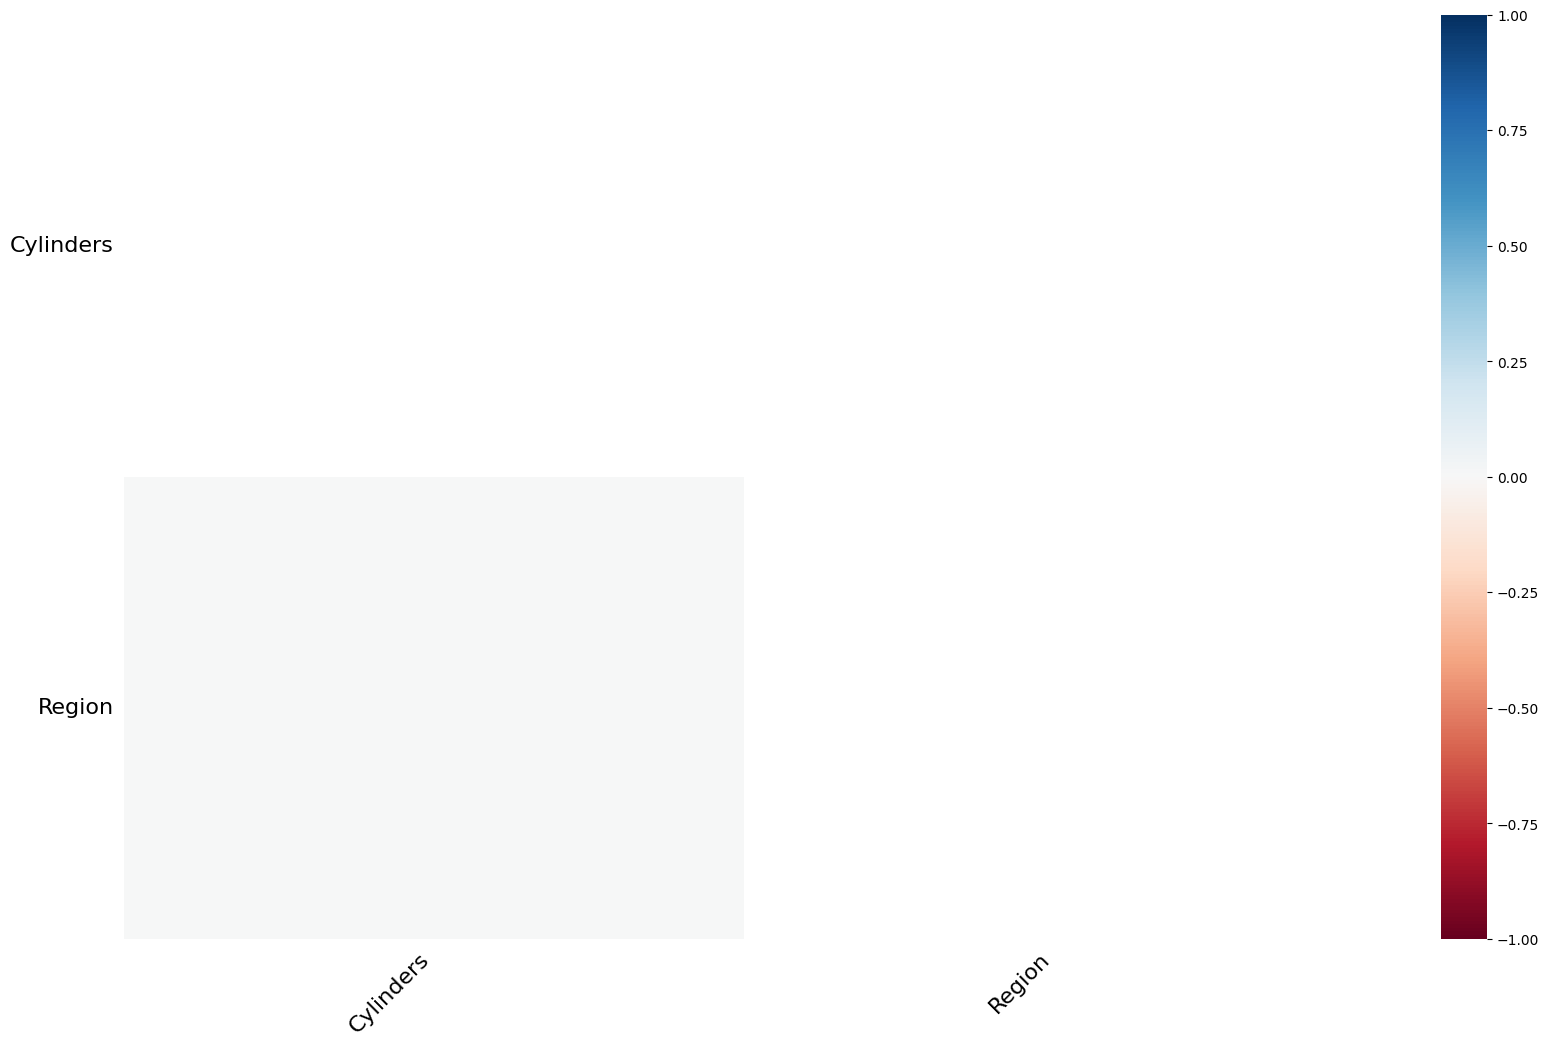

In [42]:
import missingno as msno
# msno.matrix(df)
msno.heatmap(df)        # Shows correlations between missingness

The missingno.heatmap() visualization shows no significant correlation between the missing values across different columns. This indicates that the missing data is likely independent and not related to missingness in other features.

In [43]:
# it concludes that it is safe to remove null values from the dataset
df.dropna(inplace=True)

In [48]:
print(f'We can see that there is loss of rows in our dataset {62946-df.shape[0]} which is only {np.round(671/62946*100,2)}% of the data')

We can see that there is loss of rows in our dataset 671 which is only 1.07% of the data


# Working on Accuracy related problems  